https://medium.com/mlearning-ai/k-means-clustering-with-scikit-learn-e2af706450e4 --> A different way to do elbow curve   

https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py --> different method to do mini batch kmeans 

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_plusplus.html --> try this??

https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

https://towardsdev.com/outlier-detection-using-k-means-clustering-in-python-214188fc90e8

https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3

things to do:
1. kmeans++ jasmin
2. exploring the random state it kind of helps?? not so sure actually i haven try big numbers samiksha
4. things to put it report the three methods clodia 

we all try find public code?

comparsion metric:
1. timing???
2. how well it cluster???



stuff to discuss:
1. are we using three variables??
2. scaling affects!!!!!

In [98]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.cluster import KMeans
from sklearn.cluster import kmeans_plusplus
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from mpl_toolkits import mplot3d 
from mpl_toolkits.mplot3d import Axes3D
sb.set() # set the default Seaborn style for graphics
pd.options.mode.chained_assignment = None
scaler = MinMaxScaler()

In [99]:
miamiData = pd.read_csv("./miami_housing.csv") #import fresh data  
miamiData[["LATITUDE", "LONGITUDE"]] = scaler.fit_transform(miamiData[["LATITUDE", "LONGITUDE"]])
miamiData.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,0.845660,0.903382,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,0.846203,0.918989,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,0.846222,0.919529,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,0.847019,0.922091,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,0.847130,0.917398,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


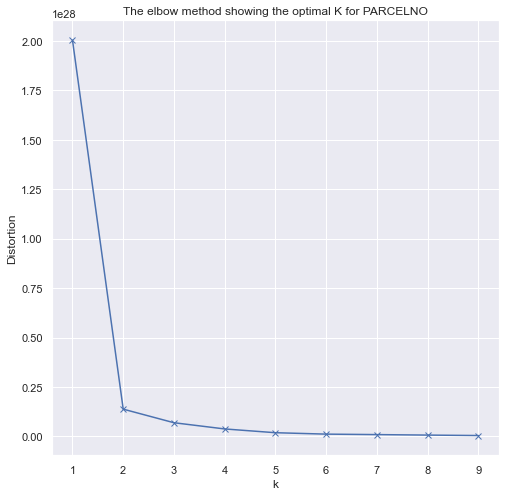

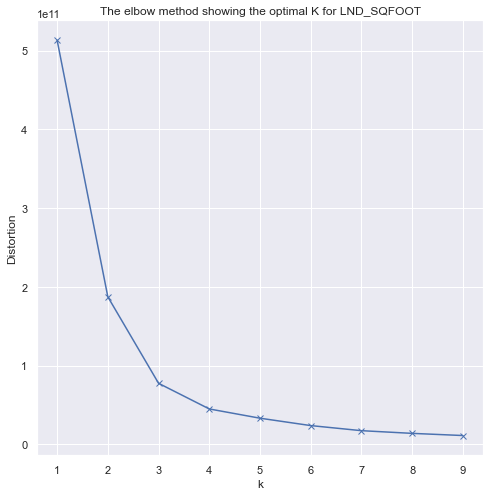

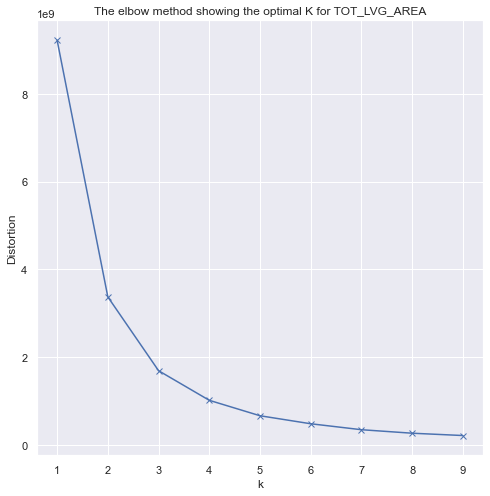

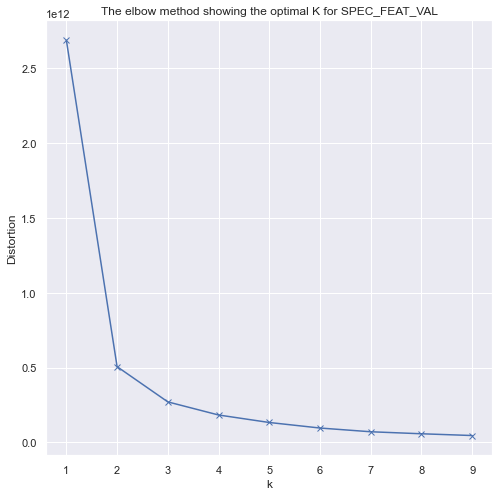

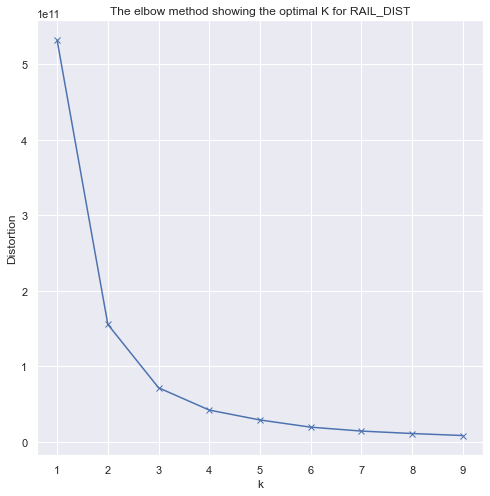

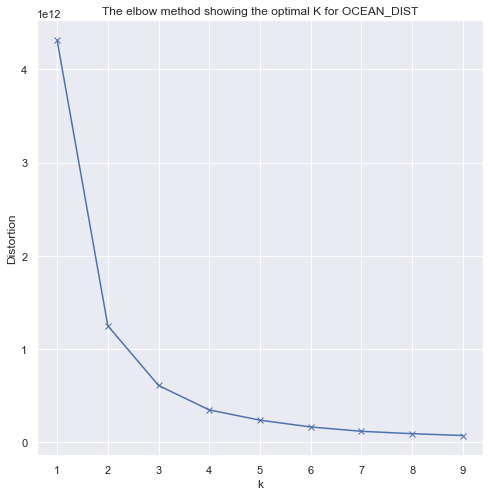

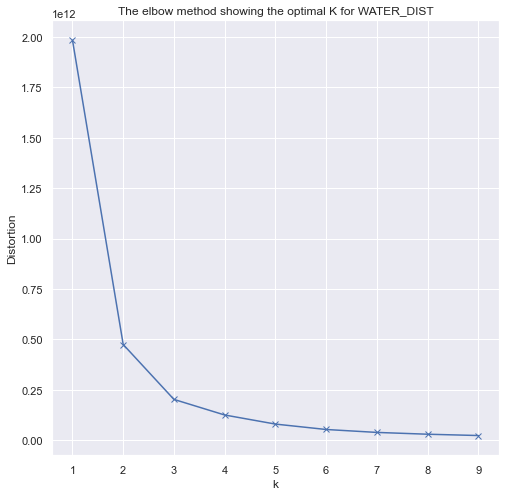

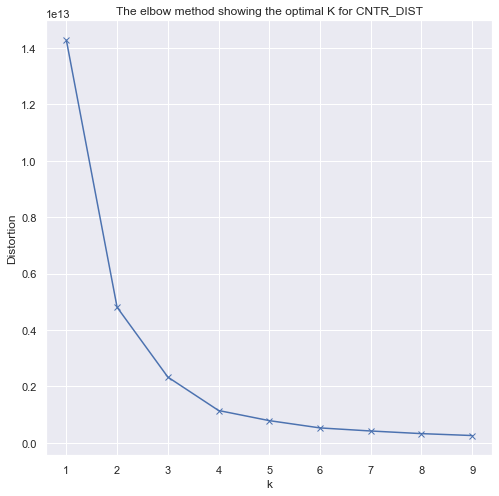

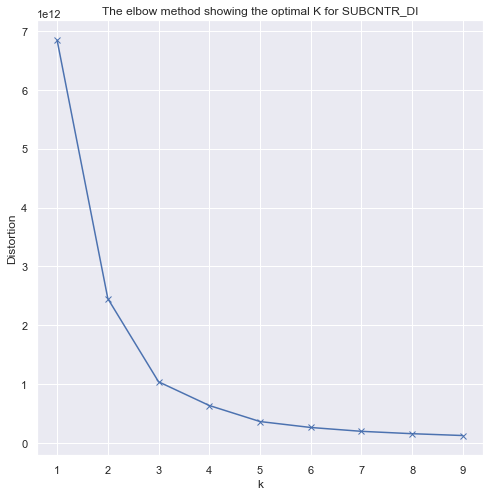

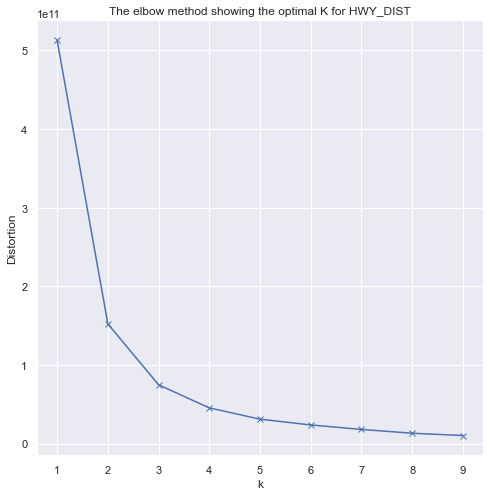

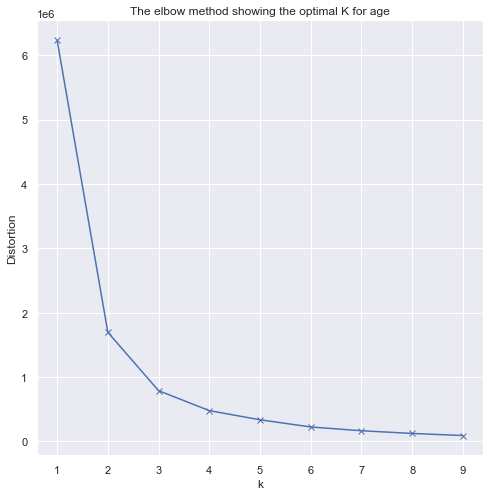

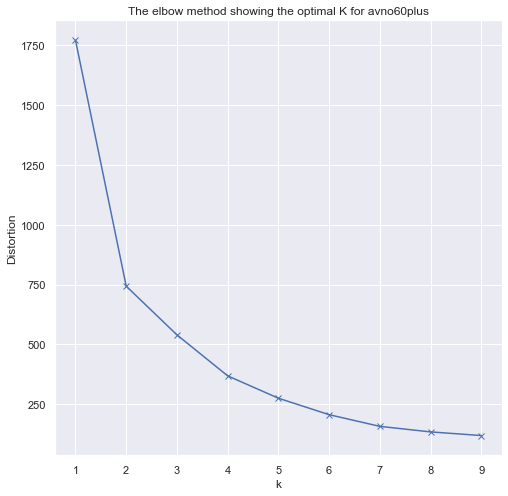

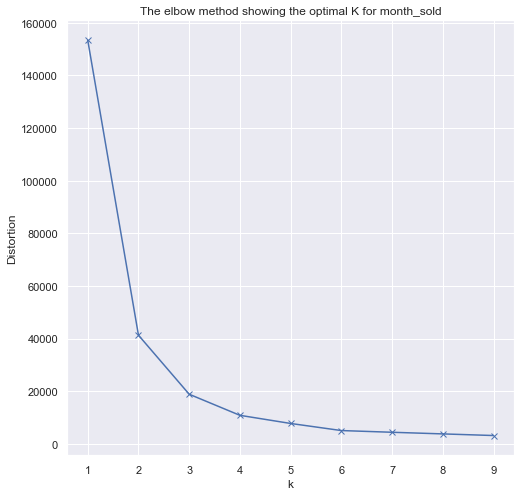

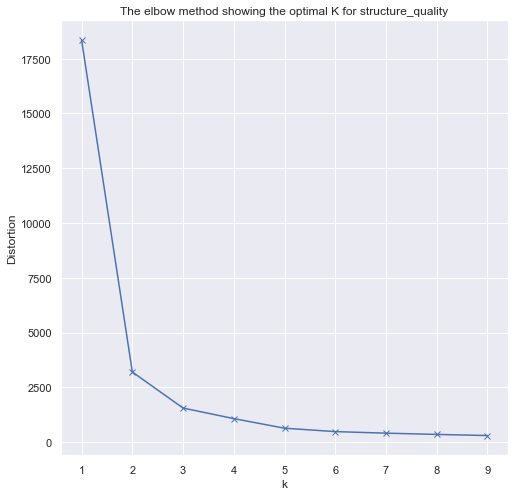

In [100]:
### testing things - can ignore
testData = miamiData.drop(columns=['LATITUDE', 'LONGITUDE', 'SALE_PRC'])
for var in testData:
    data = pd.DataFrame(miamiData[['LATITUDE', 'LONGITUDE', var]])
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)

    plt.figure(figsize=(8,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The elbow method showing the optimal K for '+ var)
    plt.show()

In [101]:
def three_Feature_clustering(varname):
   
    dataset = pd.read_csv("./miami_housing.csv") #import fresh data  
    dataset[["LATITUDE", "LONGITUDE", varname]] = scaler.fit_transform(dataset[["LATITUDE", "LONGITUDE", varname]])
    print(dataset[["LATITUDE", "LONGITUDE", varname]])
    X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO', varname]]
    init_cents = np.random.rand(4,3)
    k_means = KMeans(n_clusters=4, init=init_cents, random_state=42, n_init=1) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE', varname]])
    end = time.time()
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
    
#     sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")
#     sb.scatterplot(data = centroid, x=centroid[:, 1], y=centroid[:,0], color = "black")
    plt.figure(figsize=(8,5))
    sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
    string = "Price based on cluster with variable " +str(varname)
    plt.title(string)
    
    fig = plt.figure(figsize=(16,6))
    xs = dataset[['LATITUDE']].to_numpy()
    ys = dataset[['LONGITUDE']].to_numpy()
    zs = dataset[[varname]].to_numpy()
    cs = dataset[['clusters']].to_numpy()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs,ys,zs, c=cs, cmap='Accent', alpha=0.01)
    ax.scatter(init_cents[:,0], init_cents[:,1], init_cents[:,2], color="black", marker="x", s=200)
    print("Data for kmeans: ", varname)
    print("Time Taken for kmeans: ", end-start)
    plt.show()
    

In [102]:
def three_Feature_clustering_kmeanspp(varname):
    
    dataset = pd.read_csv("./miami_housing.csv") #import fresh data  
    dataset[["LATITUDE", "LONGITUDE", varname]] = scaler.fit_transform(dataset[["LATITUDE", "LONGITUDE", varname]])
    X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO', varname]]
    centers_init, indices = kmeans_plusplus(X[["LATITUDE", "LONGITUDE", varname]].to_numpy(), n_clusters=4, random_state=42)
    
    k_means = KMeans(n_clusters=4, init='k-means++', random_state=42) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE', varname]])
    end = time.time()
    print("Data for kmeans++: ", varname)
    print("Time Taken for kmeans++: ", end-start)
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
#     plt.figure(figsize=(16, 6))
#     sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")
    plt.figure(figsize=(8,5))
    sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
    string = "Price based on cluster with variable " +str(varname)
    plt.title(string)
    
    fig = plt.figure(figsize=(16,6))
    xs = dataset[['LATITUDE']].to_numpy()
    ys = dataset[['LONGITUDE']].to_numpy()
    zs = dataset[[varname]].to_numpy()
    cs = dataset[['clusters']].to_numpy()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs,ys,zs, c=cs, cmap='Accent', alpha=0.01)
    ax.scatter(centers_init[:,0], centers_init[:,1], centers_init[:,2], color="black", marker="x", s=200)
    plt.show()

       LATITUDE  LONGITUDE  TOT_LVG_AREA
0      0.845660   0.903382      0.165470
1      0.846203   0.918989      0.158476
2      0.846222   0.919529      0.261734
3      0.847019   0.922091      0.221609
4      0.847130   0.917398      0.152770
...         ...        ...           ...
13927  0.645862   0.668466      0.020799
13928  0.646704   0.667142      0.184060
13929  0.647090   0.677152      0.076753
13930  0.647485   0.673799      0.139702
13931  0.648189   0.670582      0.186453

[13932 rows x 3 columns]
Data for kmeans:  TOT_LVG_AREA
Time Taken for kmeans:  0.012999534606933594


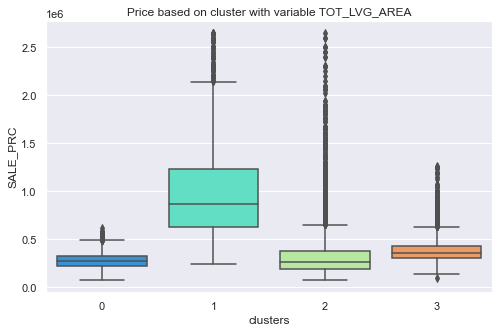

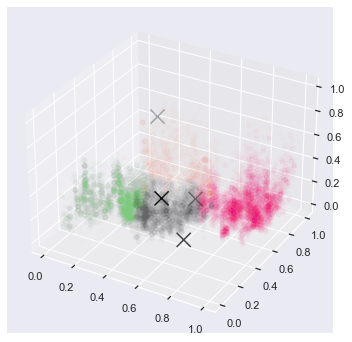

Data for kmeans++:  TOT_LVG_AREA
Time Taken for kmeans++:  0.15700006484985352


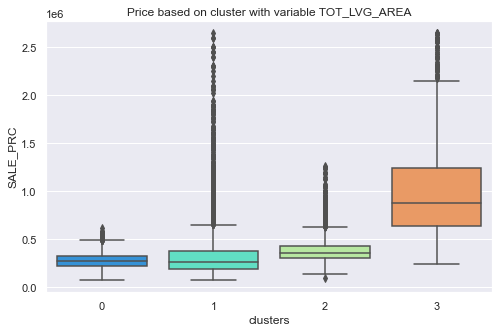

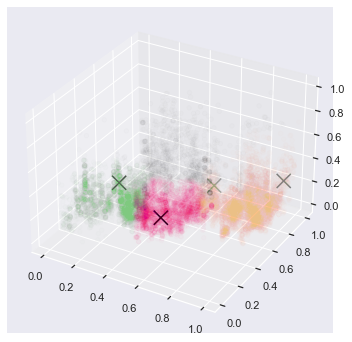

       LATITUDE  LONGITUDE  OCEAN_DIST
0      0.845660   0.903382    0.166541
1      0.846203   0.918989    0.137895
2      0.846222   0.919529    0.136911
3      0.847019   0.922091    0.131381
4      0.847130   0.917398    0.140390
...         ...        ...         ...
13927  0.645862   0.668466    0.269265
13928  0.646704   0.667142    0.272231
13929  0.647090   0.677152    0.265821
13930  0.647485   0.673799    0.268929
13931  0.648189   0.670582    0.273127

[13932 rows x 3 columns]
Data for kmeans:  OCEAN_DIST
Time Taken for kmeans:  0.011999130249023438


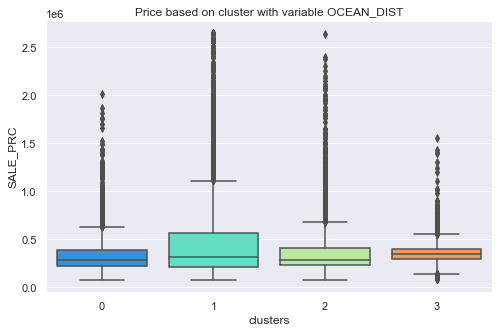

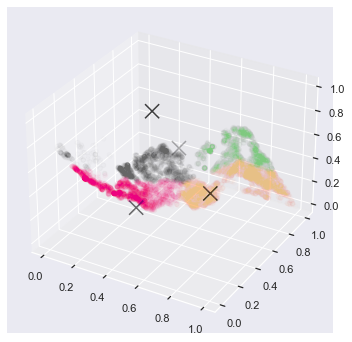

Data for kmeans++:  OCEAN_DIST
Time Taken for kmeans++:  0.11599946022033691


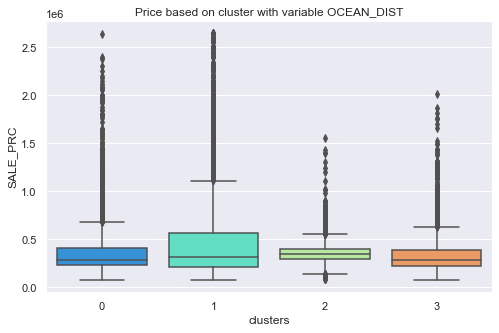

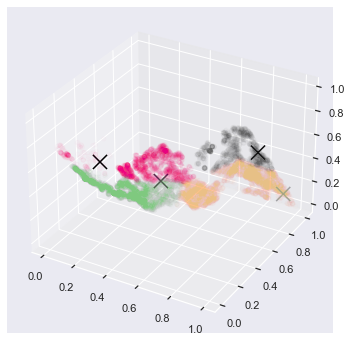

       LATITUDE  LONGITUDE  HWY_DIST
0      0.845660   0.903382  0.329985
1      0.846203   0.918989  0.375122
2      0.846222   0.919529  0.376693
3      0.847019   0.922091  0.383222
4      0.847130   0.917398  0.370513
...         ...        ...       ...
13927  0.645862   0.668466  0.017206
13928  0.646704   0.667142  0.013478
13929  0.647090   0.677152  0.013593
13930  0.647485   0.673799  0.011147
13931  0.648189   0.670582  0.007998

[13932 rows x 3 columns]
Data for kmeans:  HWY_DIST
Time Taken for kmeans:  0.01196432113647461


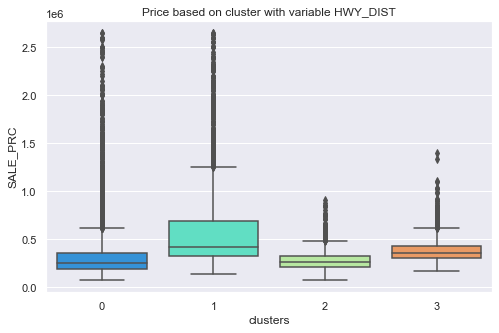

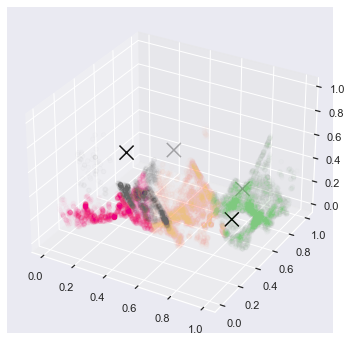

Data for kmeans++:  HWY_DIST
Time Taken for kmeans++:  0.1249995231628418


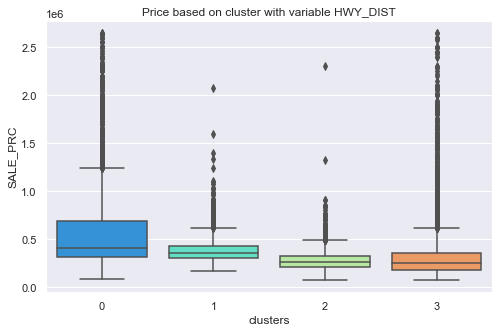

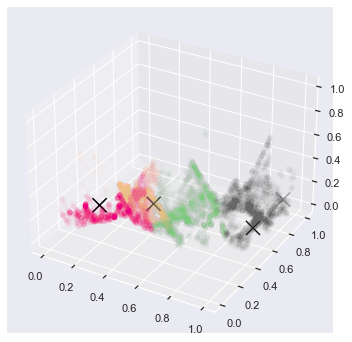

In [103]:
#list = ["LND_SQFOOT","TOT_LVG_AREA","SPEC_FEAT_VAL","RAIL_DIST","OCEAN_DIST","WATER_DIST","CNTR_DIST","SUBCNTR_DI","HWY_DIST","age","avno60plus","month_sold","structure_quality"]
list = ["TOT_LVG_AREA", "OCEAN_DIST", "HWY_DIST"]
for item in list:
    three_Feature_clustering(item)
    three_Feature_clustering_kmeanspp(item)

### Kmeans vs DBscan

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

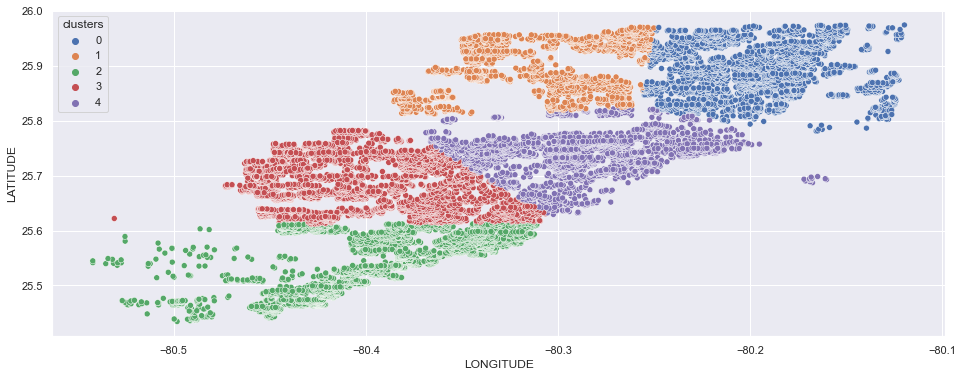

In [104]:
dataset = pd.read_csv("miami_housing.csv") #import data 
X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO']]
k_means = KMeans(n_clusters=5, init='random')
X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE']])
X = X[['PARCELNO', 'clusters']]
dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
plt.figure(figsize=(16, 6))
sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

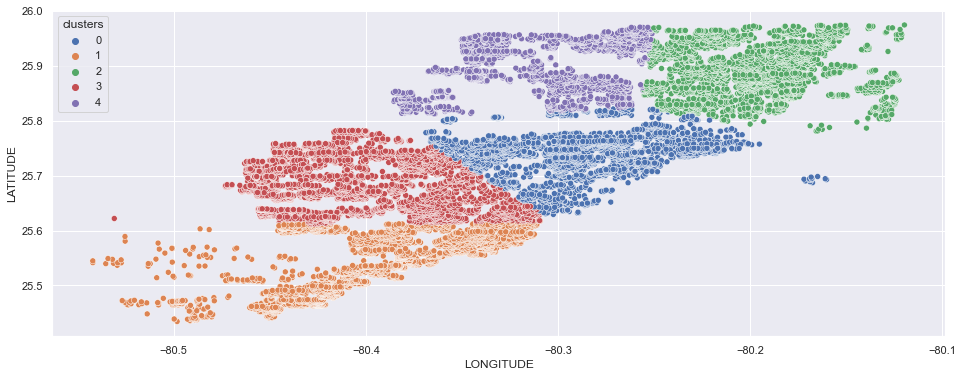

In [105]:
dataset = pd.read_csv("miami_housing.csv") #import data 
X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO']]
k_means = KMeans(n_clusters=5, init='k-means++')
X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE']])
X = X[['PARCELNO', 'clusters']]
dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
plt.figure(figsize=(16, 6))
sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")

<AxesSubplot:xlabel='OCEAN_DIST', ylabel='WATER_DIST'>

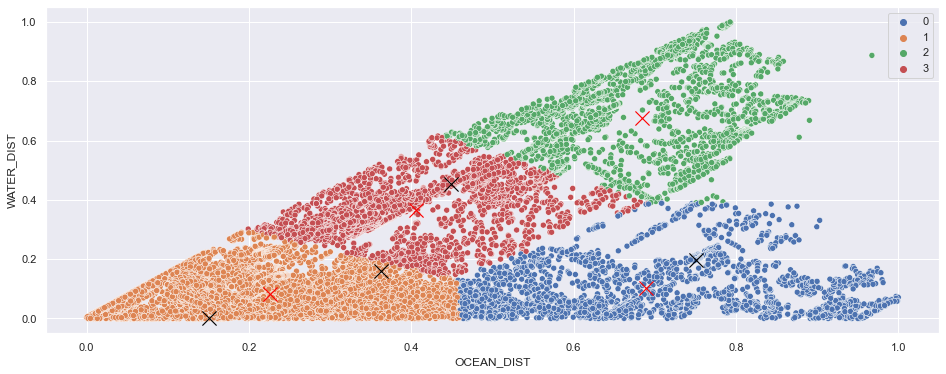

In [115]:
dataset = pd.read_csv("miami_housing.csv") #import data 
X = dataset[['OCEAN_DIST', 'WATER_DIST', 'PARCELNO']]
X[['OCEAN_DIST', 'WATER_DIST']] = scaler.fit_transform(X[['OCEAN_DIST', 'WATER_DIST']])
k_means = KMeans(n_clusters=4, init='k-means++', random_state=42)
centers_init, indices = kmeans_plusplus(X[['OCEAN_DIST', 'WATER_DIST']].to_numpy(), n_clusters=4, random_state=42)
X['clusters'] = k_means.fit_predict(X[['OCEAN_DIST', 'WATER_DIST']])
X = X[['PARCELNO', 'clusters']]
dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
dataset[['OCEAN_DIST', 'WATER_DIST']] = scaler.fit_transform(dataset[['OCEAN_DIST', 'WATER_DIST']])
plt.figure(figsize=(16, 6))
sb.scatterplot(data=dataset, x="OCEAN_DIST", y="WATER_DIST", hue="clusters", palette="deep")
sb.scatterplot(data=centers_init, x=centers_init[:, 0], y=centers_init[:, 1], color="black", marker="x", s=200)
sb.scatterplot(data=k_means.cluster_centers_, x=k_means.cluster_centers_[:, 0], y=k_means.cluster_centers_[:, 1], color="red", marker="x", s=200)

In [107]:
#for dbscan

<AxesSubplot:xlabel='OCEAN_DIST', ylabel='SALE_PRC'>

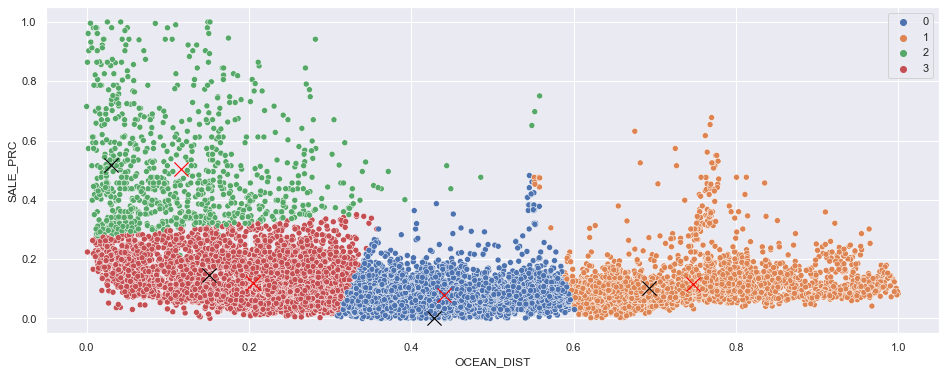

In [118]:
dataset = pd.read_csv("miami_housing.csv") #import data 
X = dataset[['OCEAN_DIST', 'SALE_PRC', 'PARCELNO']]
X[['OCEAN_DIST', 'SALE_PRC']] = scaler.fit_transform(X[['OCEAN_DIST', 'SALE_PRC']])
k_means = KMeans(n_clusters=4, init='k-means++', random_state=42)
centers_init, indices = kmeans_plusplus(X[['OCEAN_DIST', 'SALE_PRC']].to_numpy(), n_clusters=4, random_state=42)
X['clusters'] = k_means.fit_predict(X[['OCEAN_DIST', 'SALE_PRC']])
X = X[['PARCELNO', 'clusters']]
dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
dataset[['OCEAN_DIST', 'SALE_PRC']] = scaler.fit_transform(dataset[['OCEAN_DIST', 'SALE_PRC']])
plt.figure(figsize=(16, 6))
sb.scatterplot(data=dataset, x="OCEAN_DIST", y="SALE_PRC", hue="clusters", palette="deep")
sb.scatterplot(data=centers_init, x=centers_init[:, 0], y=centers_init[:, 1], color="black", marker="x", s=200)
sb.scatterplot(data=k_means.cluster_centers_, x=k_means.cluster_centers_[:, 0], y=k_means.cluster_centers_[:, 1], color="red", marker="x", s=200)

In [109]:
#for dbscan

<AxesSubplot:xlabel='OCEAN_DIST', ylabel='HWY_DIST'>

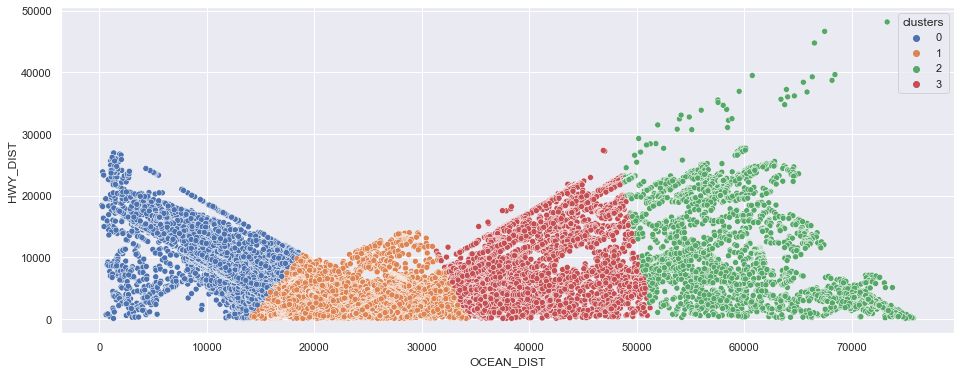

In [110]:
dataset = pd.read_csv("miami_housing.csv") #import data 
X = dataset[['OCEAN_DIST', 'HWY_DIST', 'PARCELNO']]
k_means = KMeans(n_clusters=4, init='random')
X['clusters'] = k_means.fit_predict(X[['OCEAN_DIST', 'HWY_DIST']])
X = X[['PARCELNO', 'clusters']]
dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
plt.figure(figsize=(16, 6))
sb.scatterplot(data=dataset, x="OCEAN_DIST", y="HWY_DIST", hue="clusters", palette="deep")

In [ ]:
#for dbscan